In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

%matplotlib inline

In [2]:
original = pd.read_csv('../new-datasets/flights.csv')
original.head(5)

,Search_Date,Skyscanner_Price_USD,Partner_Price_USD,Country,Partner,Airline,Origin,Destination,Departure_Date,Departure_Time,Original_Currency,Passengers_Adult,Passengers_Child,Passengers_Baby
0,2017-08-05,457.5042,457.5042,UK,easy,EZ,STN,AGP,2017-08-17,06:05:00,NaN,2,0,0
1,2017-07-14,113.7294,113.7294,UK,opuk,WZ,NCE,BUD,2017-07-25,15:40:00,GBP,1,0,0
2,2017-08-06,1118.3272,1118.3272,UK,gtuk,QF,LHR,SYD,2017-09-01,21:35:00,NaN,1,0,0
3,2017-07-25,57.2864,57.2864,UK,ryan,FR,LPL,PMI,2017-10-15,20:10:00,NaN,1,0,0
4,2017-07-14,523.3028,523.2987,JP,gtjp,JL,HND,BKK,2017-10-12,21:05:00,JPY,1,0,0


In [68]:
original.describe()

,Skyscanner_Price_USD,Partner_Price_USD,Passengers_Adult,Passengers_Child,Passengers_Baby
count,766300.000000,7.663000e+05,766300.000000,766300.000000,766300.00000
mean,710.013416,7.487420e+02,1.499919,0.118211,0.02730
std,1246.041465,9.109803e+03,0.859848,0.433801,0.16735
min,1.166400,0.000000e+00,1.000000,0.000000,0.00000
25%,206.215075,2.099603e+02,1.000000,0.000000,0.00000
50%,444.061050,4.531693e+02,1.000000,0.000000,0.00000
75%,858.432000,8.764575e+02,2.000000,0.000000,0.00000
max,306742.455300,6.712490e+06,12.000000,7.000000,4.00000


In [69]:
original.isnull().sum().sort_values()

Search_Date                  0
Skyscanner_Price_USD         0
Partner_Price_USD            0
Partner                      0
Origin                       0
Destination                  0
Departure_Date               0
Departure_Time               0
Passengers_Adult             0
Passengers_Child             0
Passengers_Baby              0
Airline                      7
Country                     17
Original_Currency       241274
dtype: int64

In [3]:
data = original.copy()
data = data.dropna(subset=['Country']) 
data = data.dropna(subset=['Airline'])

In [4]:
data.Airline.unique().size
data.Airline.unique()

array(['EZ', 'WZ', 'QF', 'FR', 'JL', '7', 'V1', 'PR', 'RJ', 'DD', 'IB',
       'NL', 'SQ', 'GA', 'MR', 'TK', 'AF', 'KL', 'KQ', 'EK', 'FZ', 'PG',
       'WS', '4V', 'BA', 'AZ', 'JQ', 'RO', 'AI', 'GR', 'LG', 'F9', 'AB',
       'CX', 'AS', 'FD', 'SK', 'Y4', 'D7', 'V7', 'KK', 'ME', 'NK', 'WY',
       'H9', 'LX', 'LA', 'B6', 'TG', 'KE', '0S', 'A3', 'LH', 'AY', '58',
       '29', 'NZ', 'JJ', 'OK', '36', 'VS', 'LY', 'C2', 'JT', 'QR', 'TP',
       'MK', '52', 'TR', 'HV', '3', 'BE', 'AC', '3N', 'TX', 'CM', 'AM',
       'KU', 'JW', 'LS', 'ZB', '49', 'S7', 'ET', 'KP', 'L8', '59', 'OR',
       'CI', 'DY', '72', '78', 'IT', 'IK', 'KM', 'CA', 'HA', 'TU', 'CZ',
       '5N', 'U6', '60', 'NO', 'OZ', 'LO', 'JU', 'SU', 'OS', 'PS', 'MF',
       '0E', 'XD', 'WD', 'DL', 'S~', '9R', '6J', '9W', 'EW', 'MU', 'AT',
       'OA', 'I_', 'E1', '6', 'BR', 'XQ', 'NH', 'OU', 'UX', 'S4', 'SP',
       'M9', 'BI', 'JP', 'QD', '51', 'FV', 'AK', 'G9', 'Y1', '6B', 'TT',
       'MH', 'EI', 'SV', 'DE', 'AV', 'SC', 'FM', 'G2',

In [5]:
regex = "[A-Z0-9]{2}"
filter = data['Airline'].str.contains(regex)
data = data[filter]

In [6]:
threshold = 2
vc = data.Partner.value_counts()
to_remove = vc[vc <= threshold].index
data['Partner'].replace(to_remove, np.nan, inplace=True)
data.Partner.value_counts()

skyp    24038
gtuk    20302
gtbf    18903
ryan    18474
opuk    17485
lmuk    16001
tpuk    14692
wizz    12215
easy    11699
opde    10835
soth    10598
omeg    10178
xpuk     9815
tsde     9758
at24     9733
s1uk     9146
lmde     8850
lmit     6893
sunl     6536
peta     6068
vaya     5864
lmfr     5660
mdtr     5547
skap     4878
kfde     4827
tu1p     4753
bjet     4542
lolt     4483
etrp     4337
eurw     4305
        ...  
finn        9
peis        9
aaru        9
aabm        9
otuk        9
newz        8
fnco        8
flbg        7
aahn        7
pegi        7
aerm        7
sta_        7
aust        7
aaht        6
aabs        6
ausa        6
aprj        6
masa        4
otua        4
vaar        4
flse        4
vols        4
arar        4
vamx        4
aajm        3
aani        3
pese        3
aaaw        3
eiai        3
aabo        3
Name: Partner, Length: 776, dtype: int64

In [7]:
data.isnull().sum().sort_values()

Search_Date                  0
Skyscanner_Price_USD         0
Partner_Price_USD            0
Country                      0
Airline                      0
Origin                       0
Destination                  0
Departure_Date               0
Departure_Time               0
Passengers_Adult             0
Passengers_Child             0
Passengers_Baby              0
Partner                     13
Original_Currency       232763
dtype: int64

In [9]:
data = data.dropna(subset=['Partner'])
data.isnull().sum().sort_values()

Search_Date                  0
Skyscanner_Price_USD         0
Partner_Price_USD            0
Country                      0
Partner                      0
Airline                      0
Origin                       0
Destination                  0
Departure_Date               0
Departure_Time               0
Passengers_Adult             0
Passengers_Child             0
Passengers_Baby              0
Original_Currency       232753
dtype: int64

In [8]:
data.Country.unique()

array(['UK', 'JP', 'AU', 'US', 'KR', 'QA', 'ES', 'PK', 'DE', 'IE', 'IT',
       'TR', 'NL', 'RO', 'SG', 'DK', 'FR', 'IN', 'HU', 'NZ', 'FI', 'TH',
       'GR', 'SE', 'ID', 'RU', 'IL', 'AR', 'BE', 'KW', 'TW', 'AT', 'MY',
       'CA', 'PL', 'PT', 'HK', 'CZ', 'HR', 'UA', 'SA', 'PA', 'CY', 'AE',
       'SK', 'CH', 'BR', 'NO', 'CO', 'DZ', 'MX', 'CL', 'GF', 'PH', 'EE',
       'GE', 'GT', 'BG', 'VN', 'LK', 'AS', 'LV', 'TT', 'ZA', 'LT', 'RS',
       'SI', 'MK', 'PE', 'EG', 'OM', 'CR', 'EC', 'AL', 'BM', 'MO', 'AZ',
       'MT', 'JO', 'SV', 'NG', 'VE', 'IR', 'LU', 'GH', 'BY', 'BH', 'AM',
       'MA', 'DO', 'MD', 'MM', 'CU', 'GY', 'KZ', 'TN', 'TM', 'PY', 'KY',
       'MZ', 'AW', 'TZ', 'UY', 'IQ', 'HN', 'MN', 'ME', 'GI', 'NP', 'SD',
       'NI', 'CD', 'SN', 'IS', 'LB', 'VI', 'KH', 'BW', 'PR', 'CM', 'BA',
       'NC', 'AF', 'BD', 'BF', 'KG', 'AO', 'CG', 'BS', 'ZW', 'AI', 'MU',
       'MV', 'CI', 'CV', 'VC', 'HT', 'BO', 'VG', 'BN', 'VA', 'BT', 'GP',
       'KN', 'AG', 'RE', 'LA', 'BB', 'DJ', 'BZ', 'T

In [10]:
data.Destination.value_counts()

BKK    17556
AMS    11697
LHR    11432
DPS    10013
JFK     9833
IST     9227
CDG     8863
BCN     8580
PMI     8274
MAD     8059
FCO     7120
ATH     7055
NRT     6853
LIS     6751
ICN     6666
SYD     6615
HKG     6560
LAX     6530
SIN     6297
LGW     6246
DEL     6241
DXB     5814
MNL     5411
DUB     5341
TPE     5195
PRG     5177
KUL     5168
MEL     4986
BUD     4940
TXL     4923
       ...  
TRW        1
LNS        1
PRC        1
FLG        1
DGA        1
YNG        1
HHH        1
DEA        1
GZO        1
YTS        1
HIB        1
HLH        1
LSH        1
LIW        1
PGV        1
FUN        1
NQU        1
EGE        1
SAB        1
PIA        1
OZG        1
FUG        1
KET        1
PUU        1
OIR        1
GVR        1
SWO        1
BLV        1
RCU        1
BVH        1
Name: Destination, Length: 2349, dtype: int64

In [11]:
threshold = 2
vc = data.Destination.value_counts()
to_remove = vc[vc <= threshold].index
data['Destination'].replace(to_remove, np.nan, inplace=True)
data.Destination.value_counts()

BKK    17556
AMS    11697
LHR    11432
DPS    10013
JFK     9833
IST     9227
CDG     8863
BCN     8580
PMI     8274
MAD     8059
FCO     7120
ATH     7055
NRT     6853
LIS     6751
ICN     6666
SYD     6615
HKG     6560
LAX     6530
SIN     6297
LGW     6246
DEL     6241
DXB     5814
MNL     5411
DUB     5341
TPE     5195
PRG     5177
KUL     5168
MEL     4986
BUD     4940
TXL     4923
       ...  
CNY        3
STX        3
PZO        3
CTL        3
RDO        3
AUR        3
KZS        3
YZZ        3
KAN        3
CVM        3
AJR        3
MGM        3
GOH        3
UPN        3
OLX        3
PNZ        3
YUS        3
CLQ        3
NDG        3
ZAL        3
UTN        3
AGT        3
KEP        3
SRP        3
AGS        3
LAN        3
NLK        3
SNW        3
BHB        3
IXG        3
Name: Destination, Length: 1917, dtype: int64

In [12]:
data = data.dropna(subset=['Airline'])
data = data.dropna(subset=['Country'])
data = data.dropna(subset=['Destination'])

In [13]:
data.Origin.unique()

array(['STN', 'NCE', 'LHR', ..., 'HKK', 'HDG', 'BYM'], dtype=object)

In [14]:
del data['Original_Currency']
data.head()

,Search_Date,Skyscanner_Price_USD,Partner_Price_USD,Country,Partner,Airline,Origin,Destination,Departure_Date,Departure_Time,Passengers_Adult,Passengers_Child,Passengers_Baby
0,2017-08-05,457.5042,457.5042,UK,easy,EZ,STN,AGP,2017-08-17,06:05:00,2,0,0
1,2017-07-14,113.7294,113.7294,UK,opuk,WZ,NCE,BUD,2017-07-25,15:40:00,1,0,0
2,2017-08-06,1118.3272,1118.3272,UK,gtuk,QF,LHR,SYD,2017-09-01,21:35:00,1,0,0
3,2017-07-25,57.2864,57.2864,UK,ryan,FR,LPL,PMI,2017-10-15,20:10:00,1,0,0
4,2017-07-14,523.3028,523.2987,JP,gtjp,JL,HND,BKK,2017-10-12,21:05:00,1,0,0


In [82]:
# save data to file
#data.to_csv(path_or_buf="cleaned_data.csv", sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')

In [18]:
# save encoded data to file
#data['Search_Date'] = pd.to_datetime(data['Search_Date'])
#data['Search_days_of_the_week'] = data['Search_Date'].dt.weekday_name
#data['Departure_Date'] = pd.to_datetime(data['Departure_Date'])
#data['Departure_days_of_the_week'] = data['Departure_Date'].dt.weekday_name   
#data['Accurate']= np.where((data['Partner_Price_USD'] - data['Skyscanner_Price_USD']<= 4) & (data['Partner_Price_USD'] > 0) & (data['Partner_Price_USD'] < 3000),'yes','no')
#data=data[['Country', 'Partner', 'Airline', 'Origin', 'Destination','Search_days_of_the_week', 'Departure_days_of_the_week', 'Passengers_Adult', 'Passengers_Child', 'Passengers_Baby','Accurate']]
#label_encoder = LabelEncoder()
#data = data.apply(label_encoder.fit_transform)
#data.to_csv(path_or_buf="cleaned_data_labelencoded.csv", sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')

In [15]:
#only inaccurate prices
data = data[((data.Partner_Price_USD - data.Skyscanner_Price_USD ) > 4)]
data.describe()

,Skyscanner_Price_USD,Partner_Price_USD,Passengers_Adult,Passengers_Child,Passengers_Baby
count,84416.000000,8.441600e+04,84416.000000,84416.000000,84416.000000
mean,692.386248,9.503876e+02,1.593750,0.138801,0.025362
std,833.394020,1.329296e+04,0.947912,0.473533,0.161242
min,7.285700,1.523000e+01,1.000000,0.000000,0.000000
25%,229.083000,2.744316e+02,1.000000,0.000000,0.000000
50%,447.150550,5.362007e+02,1.000000,0.000000,0.000000
75%,862.635850,1.042374e+03,2.000000,0.000000,0.000000
max,47407.006100,3.268173e+06,12.000000,6.000000,2.000000


In [16]:
data = data[['Search_Date', 'Skyscanner_Price_USD', 'Country', 'Partner', 'Airline', 'Origin', 'Destination', 'Departure_Date', 'Departure_Time', 'Passengers_Adult', 'Passengers_Child', 'Passengers_Baby']]
data.dtypes

Search_Date              object
Skyscanner_Price_USD    float64
Country                  object
Partner                  object
Airline                  object
Origin                   object
Destination              object
Departure_Date           object
Departure_Time           object
Passengers_Adult          int64
Passengers_Child          int64
Passengers_Baby           int64
dtype: object

In [37]:
data['Search_Date'] = pd.to_datetime(data['Search_Date'])
data['Search_days_of_the_week'] = data['Search_Date'].dt.weekday_name
data['Departure_Date'] = pd.to_datetime(data['Departure_Date'])
data['Departure_days_of_the_week'] = data['Departure_Date'].dt.weekday_name
data = data[['Country', 'Partner', 'Airline', 'Origin', 'Destination', 'Passengers_Adult', 'Passengers_Child', 'Passengers_Baby', 'Search_days_of_the_week', 'Departure_days_of_the_week']]


,Country,Partner,Airline,Origin,Destination,Passengers_Adult,Passengers_Child,Passengers_Baby,Search_days_of_the_week,Departure_days_of_the_week
11,31,579,210,1002,101,1,0,0,6,1
14,24,357,191,291,339,0,0,0,6,2
15,24,357,272,291,339,0,0,0,6,2
16,24,357,362,291,339,0,0,0,6,2
20,42,148,166,288,625,0,0,0,5,1


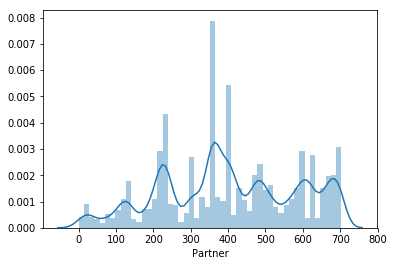

In [21]:
sns.distplot(data.Partner);

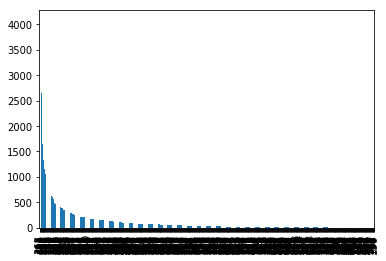

In [40]:
data.Partner.value_counts().plot(kind='bar');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38e2e52128>]], dtype=object)

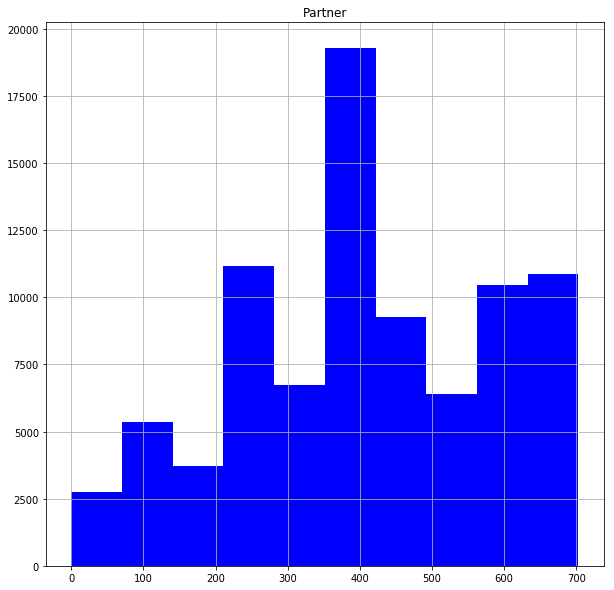

In [41]:
data.hist(column="Partner", figsize=(10, 10), color="blue")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38e28cc128>]], dtype=object)

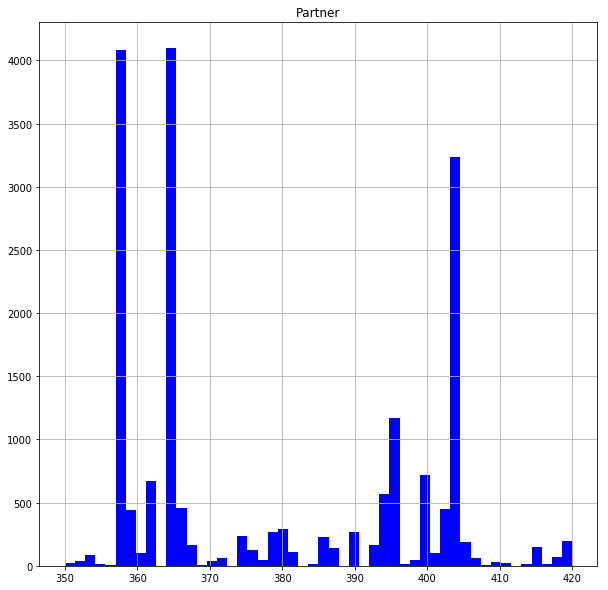

In [43]:
#partners for which the price is very likely to be unaccurate
data.hist(column="Partner", figsize=(10,10), color="blue", bins=50, range= (350,420))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38e1e5fc50>]], dtype=object)

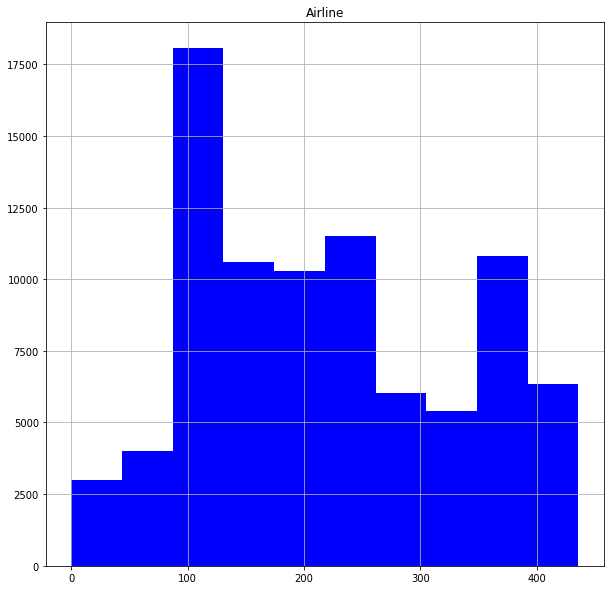

In [85]:
data.hist(column="Airline", figsize=(10, 10), color="blue")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38e2e92cc0>]], dtype=object)

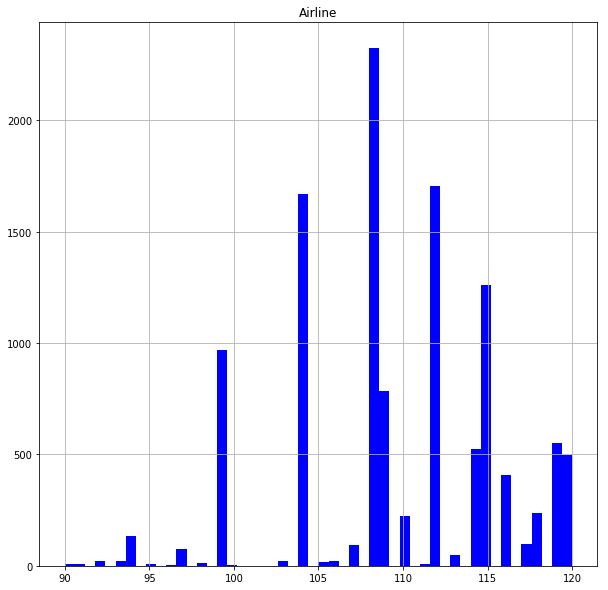

In [86]:
#airlines for which the price is very likely to be unaccurate
data.hist(column="Airline", figsize=(10,10), color="blue", bins=50, range= (90,120))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38e1e60390>]], dtype=object)

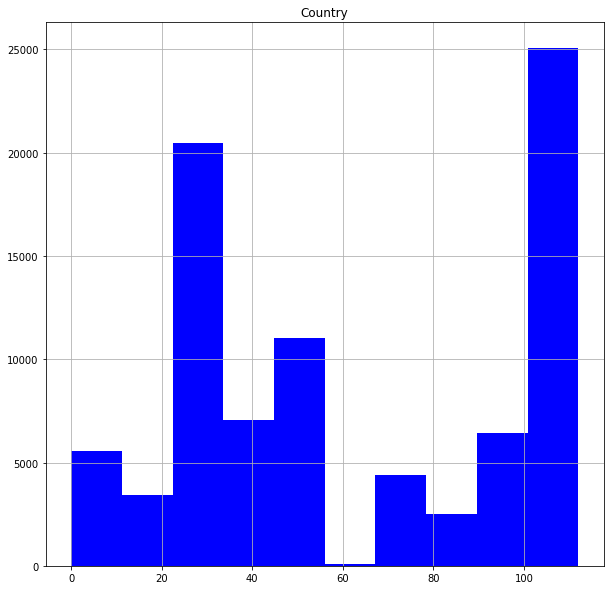

In [87]:
#countries for which the price is very likely to be unaccurate
data.hist(column="Country", figsize=(10,10), color="blue")  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38e2d60588>]], dtype=object)

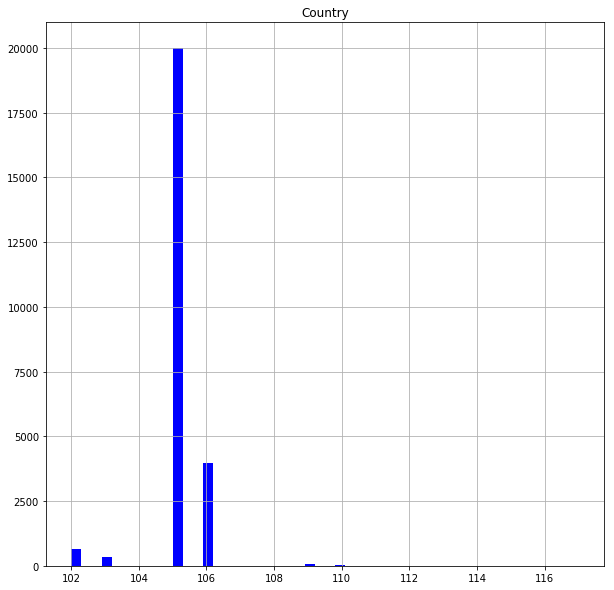

In [96]:
#countris for which the price is very likely to be unaccurate
data.hist(column="Country", figsize=(10,10), color="blue", bins=50, range= (102,117))